In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Insight :**

Kode tersebut digunakan untuk memasang (mount) Google Drive pada Google Colab, sehingga file di Google Drive bisa diakses dalam lingkungan Colab. Hasil run menunjukkan bahwa Drive sudah terpasang (mounted), dan jika ingin memasangnya ulang, pengguna dapat menggunakan argumen force_remount=True.

**1.EDA**

In [ ]:
!pip install pandas matplotlib seaborn plotly

Kode tersebut digunakan untuk menginstal pustaka Python seperti pandas, matplotlib, seaborn, dan plotly. Hasil run menunjukkan bahwa semua pustaka tersebut sudah terinstal sebelumnya dalam lingkungan Python yang digunakan, sehingga tidak ada instalasi ulang yang dilakukan.


In [ ]:
# Import pustaka
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Memuat dataset dari Google Drive
df = pd.read_csv('/content/drive/MyDrive/Dataset/RegresiUTSTelkom.csv')

In [ ]:
# Melihat 5 baris pertama data
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


Kode tersebut menggunakan df.head() untuk menampilkan 5 baris pertama dari dataset yang disimpan dalam variabel df. Hasil run menunjukkan dataset dengan 91 kolom, di mana baris pertama berisi data tahun dan baris-baris berikutnya berisi nilai numerik dengan berbagai dimensi. Ini adalah langkah awal untuk eksplorasi data.


In [ ]:
# Melihat informasi data seperti tipe data dan nilai kosong
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

Hasil run menunjukkan bahwa dataset memiliki 91 kolom dengan 515,344 entri di masing-masing kolom. Semua kolom berisi data lengkap (tanpa nilai kosong), dengan 90 kolom bertipe float64 dan 1 kolom bertipe int64. Ukuran total dataset adalah sekitar 357.8 MB.


In [ ]:
# Statistik deskriptif
df.describe()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,...,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000
mean,1998.397077,43.387113,1.289515,8.658222,1.164110,-6.553580,-9.521968,-2.391046,-1.793215,3.727868,...,15.755411,-73.461537,41.542388,37.934163,0.315750,17.669292,-26.315520,4.458653,20.035229,1.329104
std,10.931056,6.067557,51.580393,35.268505,16.322802,22.860803,12.857763,14.571853,7.963822,10.582869,...,32.099666,175.619058,122.228915,95.050718,16.161780,114.428002,173.977455,13.346567,185.558415,22.088598
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954667,-26.059848,-11.462775,-8.487507,-20.666455,-18.441005,-10.780360,-6.468390,-2.293670,...,-1.812658,-139.555737,-20.987115,-4.669655,-6.781598,-31.580617,-101.530305,-2.566137,-59.509453,-8.820248
50%,2002.000000,44.258490,8.417725,10.476235,-0.652855,-6.007770,-11.188355,-2.046625,-1.736415,3.822305,...,9.171850,-53.089115,28.790580,33.623815,0.820830,15.598520,-21.204225,3.117645,7.759910,0.053015
75%,2006.000000,47.833875,36.124030,29.764685,8.787548,7.741877,-2.388945,6.508587,2.913455,9.961865,...,26.274487,13.478793,89.661785,77.785810,8.471000,67.795110,52.389322,9.967742,86.351645,9.679540
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Hasil run menunjukkan bahwa semua kolom memiliki 515,344 data (tanpa nilai kosong). Statistik seperti rata-rata, nilai minimum, maksimum, dan kuartil memberikan gambaran umum distribusi data pada setiap kolom. Misalnya, kolom pertama berisi data tahun dengan rata-rata sekitar 1998 dan rentang dari 1922 hingga 2011. Statistik ini penting untuk memahami distribusi dan skala data sebelum analisis lebih lanjut.


In [ ]:
# Mengecek missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column: \n{missing_values}")

Missing values in each column: 
2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64


Kode tersebut menggunakan df.isnull().sum() untuk menghitung jumlah nilai kosong (missing values) di setiap kolom dalam dataset.

Hasil run menunjukkan bahwa tidak ada nilai kosong di semua kolom dataset (jumlah missing values di setiap kolom adalah 0). Hal ini mengindikasikan bahwa dataset lengkap dan tidak memerlukan pengisian atau penanganan data yang hilang sebelum analisis lebih lanjut.

In [ ]:
# Tampilkan daftar kolom dalam dataset
df.columns

Index(['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628',
       '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136',
       '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428',
       '408.98485', '383.70912', '326.51512', '238.11327', '251.42414',
       '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038',
       '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438',
       '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165',
       '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531',
       '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798',
       '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506',
       '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481',
       '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307',
       '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767',
       '-41.1245', '-8.40816

ode df.columns digunakan untuk menampilkan daftar nama kolom dalam dataset.

Hasil run menunjukkan bahwa dataset memiliki 91 kolom, yang sebagian besar menggunakan format angka sebagai nama kolom. Nama-nama kolom ini terdiri dari nilai-nilai numerik, kecuali kolom pertama (2001), yang kemungkinan merujuk ke tahun. Hasil ini membantu dalam memahami struktur dataset dan mempermudah akses ke kolom tertentu selama proses analisis data.



In [ ]:
# Menentukan kolom target yang sesuai (misalnya kolom yang paling akhir)
target_column = df.columns[-1]

Kode tersebut digunakan untuk menentukan kolom target dengan memilih kolom terakhir dari dataset.

Hasilnya, target_column akan berisi nama kolom yang berada di indeks terakhir (-1) dari daftar kolom dataset. Pendekatan ini sering digunakan dalam pembelajaran mesin untuk secara otomatis menetapkan kolom target yang biasanya terdapat di akhir dataset.

In [ ]:
# Tampilkan informasi statistik untuk kolom target
print(f"Informasi Kolom Target ({target_column}):")
print(df[target_column].describe())

Informasi Kolom Target (2.26327):
count    515344.000000
mean          1.329104
std          22.088598
min        -381.424430
25%          -8.820248
50%           0.053015
75%           9.679540
max         677.899630
Name: 2.26327, dtype: float64


**2. Visualisasi**

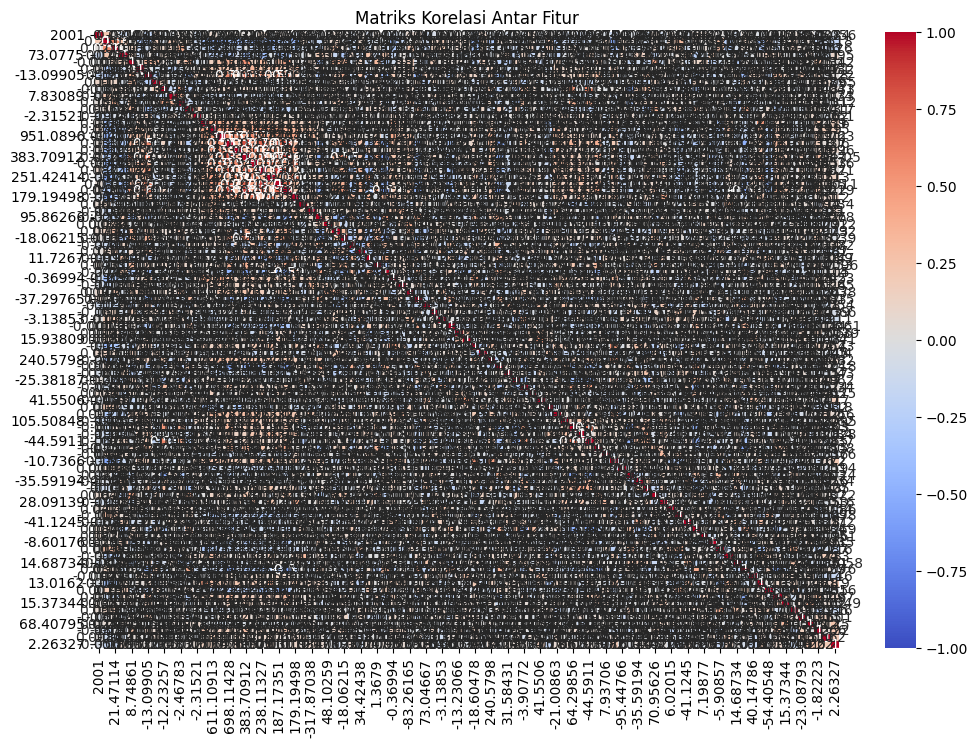

In [ ]:
# Menghitung korelasi antar fitur
correlation_matrix = df.corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriks Korelasi Antar Fitur")
plt.show()

Matriks korelasi menunjukkan hubungan antara semua kolom numerik di dataset.
Warna pada heatmap mencerminkan nilai korelasi, dengan skala dari -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna).
Namun, karena jumlah kolom yang sangat banyak (91 kolom), heatmap terlihat terlalu padat, sehingga sulit untuk dibaca.

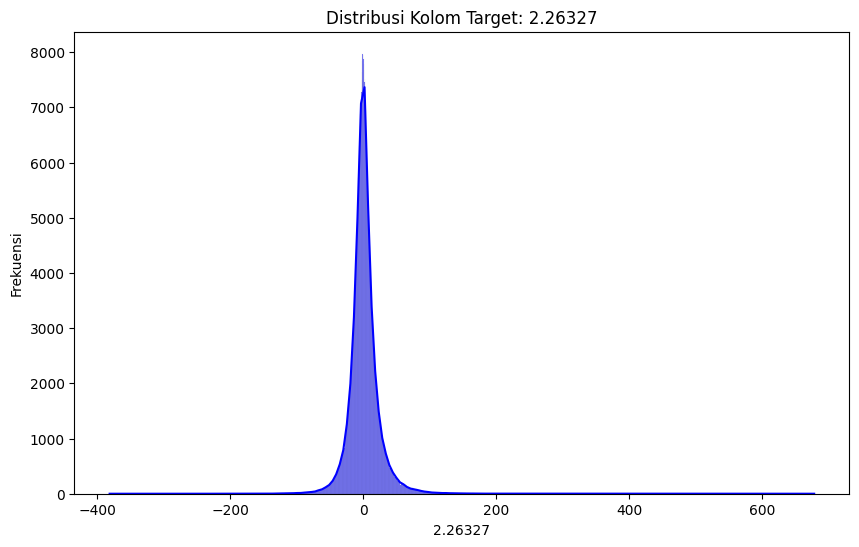

In [ ]:
# Visualisasi distribusi kolom target dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[target_column], kde=True, color='blue')
plt.title(f"Distribusi Kolom Target: {target_column}")
plt.xlabel(target_column)
plt.ylabel('Frekuensi')
plt.show()

Kode tersebut membuat histogram untuk memvisualisasikan distribusi data pada kolom target (2.26327) dengan menggunakan sns.histplot() dari pustaka Seaborn.

Hasil visualisasi menunjukkan:

Distribusi data kolom target memiliki puncak yang tajam di sekitar nilai 0, menunjukkan distribusi yang sangat terpusat.
Sebagian besar data berada di sekitar nilai 0 dengan sedikit penyebaran ke arah nilai positif dan negatif.
Ada ekor panjang di kedua sisi (outlier), yang menunjukkan nilai ekstrem di dataset.

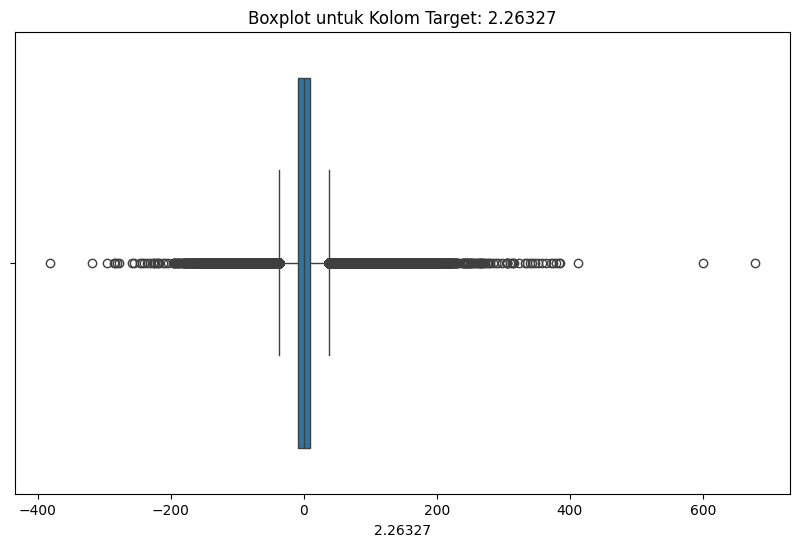

In [ ]:
# Boxplot untuk mendeteksi outliers pada kolom target
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[target_column])
plt.title(f"Boxplot untuk Kolom Target: {target_column}")
plt.show()

Boxplot untuk Kolom Target (2.26327):

Boxplot menunjukkan adanya outlier yang signifikan di kedua sisi distribusi data (baik nilai positif maupun negatif).
Mayoritas data berada dalam rentang yang sangat sempit, sedangkan outlier tersebar jauh dari rentang utama.
Insight: Kehadiran outlier dalam jumlah signifikan dapat memengaruhi analisis statistik dan model prediksi. Perlu dipertimbangkan apakah outlier akan dihapus atau ditangani khusus.



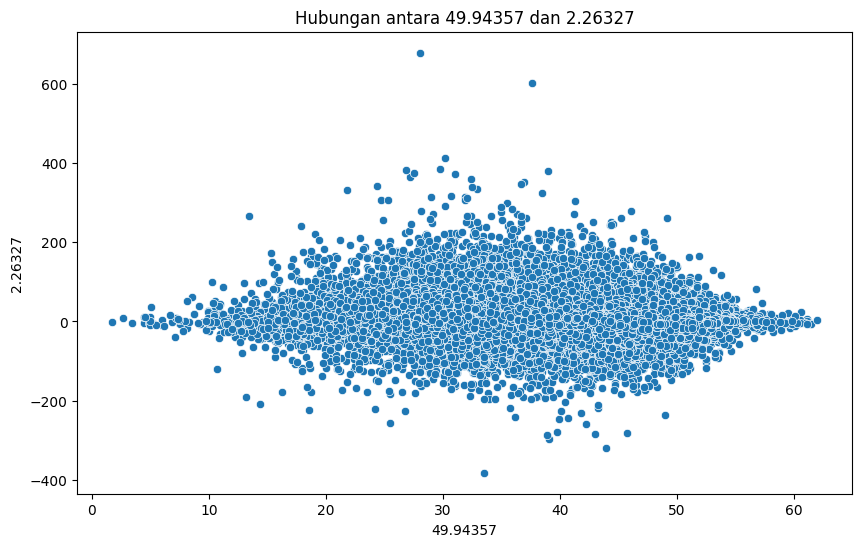

In [ ]:
# Visualisasi hubungan antara fitur pertama dan target
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[df.columns[1]], y=df[target_column])
plt.title(f"Hubungan antara {df.columns[1]} dan {target_column}")
plt.show()

Scatter Plot Hubungan antara Kolom Pertama (49.94357) dan Target (2.26327):

Scatter plot menunjukkan distribusi data yang membentuk pola menyebar (spread), tanpa pola hubungan yang jelas antara kedua kolom.
Data terlihat terkonsentrasi di tengah (di sekitar nilai 0 untuk kolom target), sementara beberapa nilai menyebar jauh (kemungkinan outlier).
Insight: Tidak ada hubungan linier yang signifikan antara kolom pertama (49.94357) dan kolom target (2.26327).Insight: XGBoost memberikan kinerja terbaik dengan kesalahan (MSE) terendah dan nilai R² tertinggi, diikuti oleh k-NN, yang menunjukkan akurasi prediksi yang lebih baik dan korelasi yang lebih kuat dengan nilai aktual dibandingkan dengan regresi Polinomial dan Pohon Keputusan.


**3, Pipeline**


===== Polynomial Regression =====
Mean Squared Error (MSE): 403.0147
R-squared (R2): 0.1721


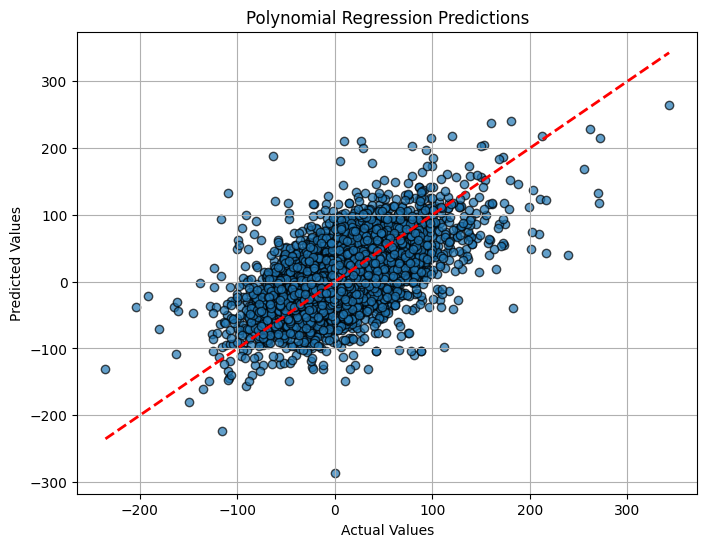


===== Decision Tree Regression =====
Mean Squared Error (MSE): 402.5552
R-squared (R2): 0.1730


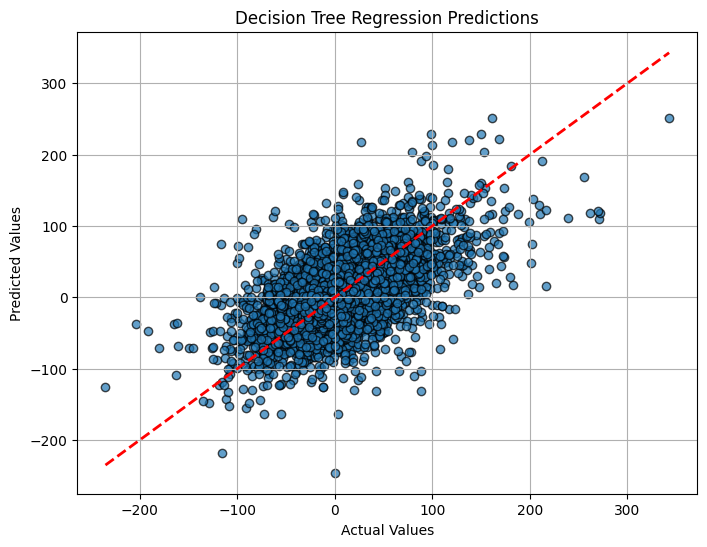


===== k-NN Regression =====
Mean Squared Error (MSE): 258.2820
R-squared (R2): 0.4694


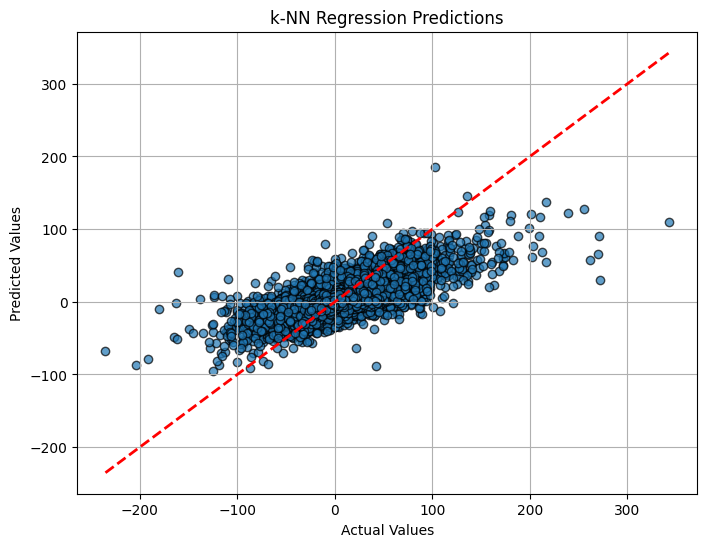


===== XGBoost Regression =====
Mean Squared Error (MSE): 160.9977
R-squared (R2): 0.6693


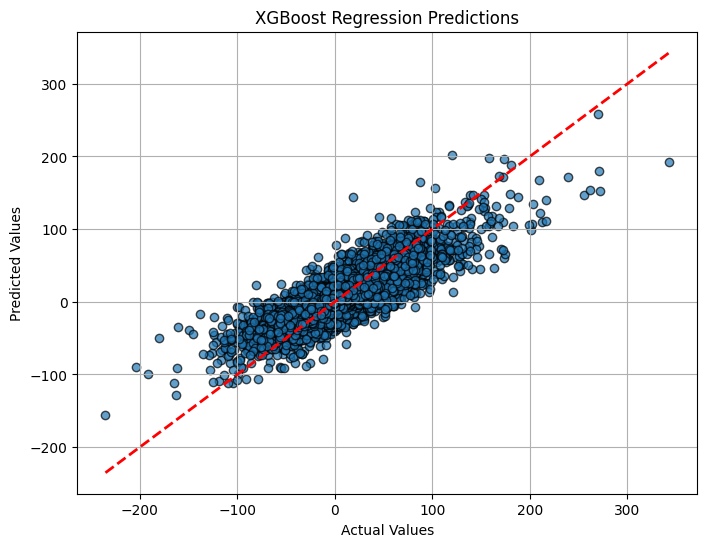

10663

In [2]:
import matplotlib.pyplot as plt

# Fungsi untuk visualisasi
def visualize_predictions(model, X_test, y_test, title):
    predictions = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.7, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(title)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()

# 1. Polynomial Regression
print("\n===== Polynomial Regression =====")
polynomial_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1)),
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
polynomial_pipeline.fit(X_train, y_train)
evaluate_model(polynomial_pipeline, X_test, y_test)
visualize_predictions(polynomial_pipeline, X_test, y_test, "Polynomial Regression Predictions")

# 2. Decision Tree Regression
print("\n===== Decision Tree Regression =====")
decision_tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
decision_tree_pipeline.fit(X_train, y_train)
evaluate_model(decision_tree_pipeline, X_test, y_test)
visualize_predictions(decision_tree_pipeline, X_test, y_test, "Decision Tree Regression Predictions")

# 3. k-NN Regression
print("\n===== k-NN Regression =====")
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])
knn_pipeline.fit(X_train, y_train)
evaluate_model(knn_pipeline, X_test, y_test)
visualize_predictions(knn_pipeline, X_test, y_test, "k-NN Regression Predictions")

# 4. XGBoost Regression
print("\n===== XGBoost Regression =====")
xgboost_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        max_depth=3,
        n_estimators=50
    ))
])
xgboost_pipeline.fit(X_train, y_train)
evaluate_model(xgboost_pipeline, X_test, y_test)
visualize_predictions(xgboost_pipeline, X_test, y_test, "XGBoost Regression Predictions")

# Bersihkan memori
gc.collect()


XGBoost memberikan kinerja terbaik dengan kesalahan (MSE) terendah dan nilai R² tertinggi, diikuti oleh k-NN, yang menunjukkan akurasi prediksi yang lebih baik dan korelasi yang lebih kuat dengan nilai aktual dibandingkan dengan regresi Polinomial dan Pohon Keputusan.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import gc

# Load Dataset
file_path = '/content/drive/MyDrive/Dataset/RegresiUTSTelkom.csv'
data = pd.read_csv(file_path)

# Sampling data (gunakan 30% dari dataset untuk menghemat memori)
data = data.sample(frac=0.3, random_state=42)

# Optimalkan tipe data
for col in data.select_dtypes(include=['float64']).columns:
    data[col] = data[col].astype('float32')
for col in data.select_dtypes(include=['int64']).columns:
    data[col] = data[col].astype('int32')

# Data Preparation
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

# Split Data (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")
    return mse, r2

# Hyperparameter Tuning and Evaluation Function (RandomizedSearchCV)
def hyperparameter_tuning_random(model, param_grid, X_train, y_train, X_test, y_test, model_name, n_iter=10):
    print(f"\n===== {model_name} Hyperparameter Tuning =====")

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model, param_distributions=param_grid, cv=5, scoring='r2', n_iter=n_iter, n_jobs=-1, random_state=42
    )
    random_search.fit(X_train, y_train)

    # Best parameters and model
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_

    # Evaluate the best model
    mse, r2 = evaluate_model(best_model, X_test, y_test)
    print(f"Best Parameters: {best_params}")

    return best_model, best_params, mse, r2

# Fungsi untuk visualisasi hasil tuning
def visualize_tuned_model(model, X_test, y_test, title):
    predictions = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.7, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line of perfect prediction
    plt.title(title)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()

# 1. Hyperparameter Tuning for Polynomial Regression
polynomial_param_grid = {
    'poly_features__degree': [1, 2],  # Kurangi jumlah degree
    'regressor__max_depth': [3, 5],  # Kurangi kombinasi depth
}
polynomial_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(interaction_only=True)),  # Batasi interaksi linier
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
best_poly_model, poly_params, poly_mse, poly_r2 = hyperparameter_tuning_random(
    polynomial_pipeline, polynomial_param_grid, X_train, y_train, X_test, y_test, "Polynomial Regression"
)
visualize_tuned_model(best_poly_model, X_test, y_test, "Polynomial Regression (Tuned) Predictions")

# 2. Hyperparameter Tuning for Decision Tree
decision_tree_param_grid = {
    'regressor__max_depth': [3, 5, None],
    'regressor__min_samples_split': [2, 5],
}
decision_tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
best_tree_model, tree_params, tree_mse, tree_r2 = hyperparameter_tuning_random(
    decision_tree_pipeline, decision_tree_param_grid, X_train, y_train, X_test, y_test, "Decision Tree Regression"
)
visualize_tuned_model(best_tree_model, X_test, y_test, "Decision Tree Regression (Tuned) Predictions")

# 3. Hyperparameter Tuning for k-NN
knn_param_grid = {
    'regressor__n_neighbors': [3, 5, 7],
    'regressor__weights': ['uniform', 'distance'],
}
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor())
])
best_knn_model, knn_params, knn_mse, knn_r2 = hyperparameter_tuning_random(
    knn_pipeline, knn_param_grid, X_train, y_train, X_test, y_test, "k-NN Regression"
)
visualize_tuned_model(best_knn_model, X_test, y_test, "k-NN Regression (Tuned) Predictions")

# 4. Hyperparameter Tuning for XGBoost
xgboost_param_grid = {
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__n_estimators': [50, 100],
}
xgboost_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])
best_xgb_model, xgb_params, xgb_mse, xgb_r2 = hyperparameter_tuning_random(
    xgboost_pipeline, xgboost_param_grid, X_train, y_train, X_test, y_test, "XGBoost Regression"
)
visualize_tuned_model(best_xgb_model, X_test, y_test, "XGBoost Regression (Tuned) Predictions")

# Report Results
report = pd.DataFrame({
    'Model': ['Polynomial Regression', 'Decision Tree', 'k-NN Regression', 'XGBoost Regression'],
    'Best Parameters': [poly_params, tree_params, knn_params, xgb_params],
    'Mean Squared Error (MSE)': [poly_mse, tree_mse, knn_mse, xgb_mse],
    'R-squared (R2)': [poly_r2, tree_r2, knn_r2, xgb_r2],
})
print("\n===== Hyperparameter Tuning Results =====")
print(report)

# Save report to a CSV file
report.to_csv("hyperparameter_tuning_results.csv", index=False)

# Bersihkan memori
gc.collect()



===== Polynomial Regression Hyperparameter Tuning =====


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
